In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.chdir('..')

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"

In [3]:
dataset_params = {
    'dataset': 'dsprites',
    'batch_size': 32,
    'cuda': True,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading dsprites dataset...
Done!



In [4]:
%%time
from src.models.conv_vsc import ConvolutionalVariationalSparseCoding

model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 100,
    'learning_rate': 3e-4,
    
    'alpha': 0.01,
    'beta': 2,
    'beta_delta': 0,
    'c': 50,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)

CPU times: user 3.96 s, sys: 1.66 s, total: 5.62 s
Wall time: 20.1 s


In [8]:
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 15, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

In [9]:
import logging

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='notebooks/train_dsprites.log',
    format='%(asctime)s - %(levelname)s - %(message)s', 
    datefmt='%d-%b-%y %H:%M:%S',
    level=logging.INFO
)

In [10]:
%%time
try:
    convvsc.run_training(logging_func=logging.info, 
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


CPU times: user 1h 5min 19s, sys: 12min 31s, total: 1h 17min 51s
Wall time: 1h 11min 46s


In [11]:
train_losses = pd.DataFrame(convvsc.train_losses)

In [16]:
train_losses.tail()

,BCE,LOSS,PRIOR,prior1,prior2
329014,979.272217,3509.798584,1265.263184,514.986572,750.276611
329015,1066.303711,3582.517090,1258.106689,507.702271,750.404419
329016,922.343262,3462.759277,1270.208008,519.825073,750.382874
329017,1022.506226,3549.204590,1263.349121,513.392883,749.956299
329018,1263.419067,3810.140625,1273.360840,521.239746,752.121033


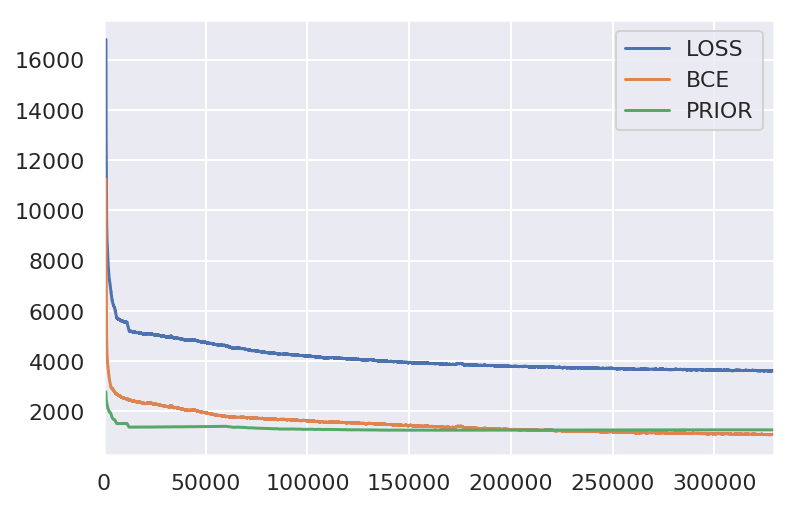

In [15]:
train_losses[['LOSS', 'BCE', 'PRIOR']].rolling(window=1000).mean().plot();

In [ ]:
%%time
try:
    convvsc.run_training(logging_func=logging.info, start_epoch=16,
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [19]:
train_losses = pd.DataFrame(convvsc.train_losses)
train_losses.tail()

,BCE,LOSS,PRIOR,prior1,prior2
657139,1037.153687,3604.660645,1283.753418,531.077759,752.675659
657140,869.072510,3408.610107,1269.768799,518.309998,751.458740
657141,871.563843,3413.853027,1271.144531,519.609375,751.535217
657142,1032.183960,3597.483398,1282.649658,531.170288,751.479370
657143,982.952332,3524.576904,1270.812256,518.657532,752.154724


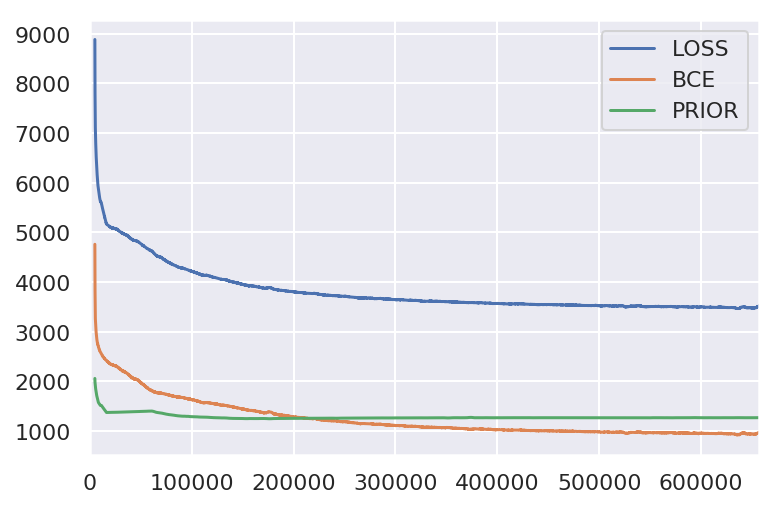

In [22]:
train_losses[['LOSS', 'BCE', 'PRIOR']].rolling(window=5000).mean().plot();

## 90 epochs

In [21]:
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 60, 
    'report_interval': 5,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

In [ ]:
%%time
try:
    convvsc.run_training(logging_func=logging.info, start_epoch=31,
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
